In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
%pip install pymorphy2
import pymorphy2
from PIL import Image

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
src_dataset = pd.read_csv('reviews_clean.csv', encoding="utf-8")

In [5]:
src_dataset.head()

,Place,Author,Date,Review,Advantages,Disadvantages,Rating
0,Клуб Hot Collection / Хот Коллекшн,Александр Иванов,2023-09-15,"Мне нравится декор и освещение в этом клубе, х...",Не указано,Не указано,5.0
1,Ресторан Birds,Наталия,2023-09-14,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,3.9
2,Клуб Hot Collection / Хот Коллекшн,alasad,2023-09-14,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,5.0
3,Банкетный зал Сосны в отеле Роял Зенит,StasFoodLover,2023-09-13,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,5.0
4,Клуб Hot Collection / Хот Коллекшн,"Эмма, Эмма",2023-09-13,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,5.0


In [6]:
src_dataset.shape

(12831, 7)

In [7]:
src_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12831 entries, 0 to 12830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place          12831 non-null  object 
 1   Author         12831 non-null  object 
 2   Date           12831 non-null  object 
 3   Review         12831 non-null  object 
 4   Advantages     12831 non-null  object 
 5   Disadvantages  12831 non-null  object 
 6   Rating         12831 non-null  float64
dtypes: float64(1), object(6)
memory usage: 701.8+ KB


In [8]:
src_dataset["Place"].value_counts()

Клуб Hot Collection / Хот Коллекшн            311
Ресторан Eshak / Ишак (Рублевка)              211
Ресторан Eshak / Ишак (Одинцово)              206
Ресторан Manana / Манана                      172
Ресторан Sixty / Сиксти                       129
                                             ... 
Ресторан Гольф-Кафе (закрыт)                    1
Ресторан Perfect / Перфект                      1
Ресторан Парус                                  1
Кафе 9 этаж (закрыт)                            1
Ресторан La Marée / Ла Маре (на Проточном)      1
Name: Place, Length: 1585, dtype: int64

In [9]:
src_dataset["Rating"].value_counts()

5.0    8800
1.0    1380
4.0     476
2.0     265
4.9     254
3.0     243
4.8     234
4.7     174
4.6     132
4.5     104
4.4      47
2.4      39
2.3      39
1.8      36
2.6      32
1.9      31
2.7      30
4.3      30
3.3      29
3.4      27
4.2      26
1.4      26
2.8      25
1.5      25
2.1      24
2.9      24
2.2      24
1.7      24
3.2      21
1.3      20
4.1      20
3.6      19
3.5      19
3.9      18
3.1      17
0.0      16
1.1      16
1.2      14
2.5      13
3.7      13
3.8      13
1.6      12
Name: Rating, dtype: int64

In [10]:
src_dataset["Advantages"] = src_dataset["Advantages"].str.replace('Не указано','')

In [11]:
src_dataset["Disadvantages"] = src_dataset["Disadvantages"].str.replace('Не указано','')

In [84]:
src_dataset["Review"] = src_dataset["Review"].str.replace('Отзыв отсутствует','')
src_dataset["Review"] = src_dataset["Review"].str.replace('Нет','')
src_dataset["Review"] = src_dataset["Review"].str.replace('.','. ')

In [13]:
src_dataset['Year'] = src_dataset.apply(lambda row: str(row["Date"]).split('-')[0], axis = 1)

In [14]:
src_dataset = src_dataset.drop(src_dataset[src_dataset["Rating"].astype(int) == 0].index)

In [15]:
src_dataset.head()

,Place,Author,Date,Review,Advantages,Disadvantages,Rating,Year
0,Клуб Hot Collection / Хот Коллекшн,Александр Иванов,2023-09-15,"Мне нравится декор и освещение в этом клубе, х...",,,5.0,2023
1,Ресторан Birds,Наталия,2023-09-14,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,3.9,2023
2,Клуб Hot Collection / Хот Коллекшн,alasad,2023-09-14,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,5.0,2023
3,Банкетный зал Сосны в отеле Роял Зенит,StasFoodLover,2023-09-13,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,5.0,2023
4,Клуб Hot Collection / Хот Коллекшн,"Эмма, Эмма",2023-09-13,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,5.0,2023


In [16]:
src_dataset.groupby(['Place'])['Rating'].mean().sort_values(ascending=False)[:20]

Place
Ресторан Pit Stop / Пит Стоп (закрыт)                  5.0
Ресторан YURA                                          5.0
Кафе Сумах (закрыт)                                    5.0
Ресторан VANI / ВАНИ                                   5.0
Ресторан Valesko / Валеско                             5.0
Ресторан Vitello / Вителло                             5.0
Ресторан Whisky Rooms / Виски Румс                     5.0
Ресторан White /  Вайт                                 5.0
Ресторан White Café                                    5.0
Кафе Сокольническая Застава (закрыт)                   5.0
Ресторан Wine&Food / Вино&Еда (закрыт)                 5.0
Кафе Синдбад (закрыт)                                  5.0
Кафе Семерана (закрыт)                                 5.0
Ресторан Yan Primus / Ян Примус (Осенний бульвар)      5.0
Ресторан Quadri / Квадри (закрыт)                      5.0
Ресторан Yan Primus / Ян Примус (Свиблово)             5.0
Кафе Рубль (закрыт)                               

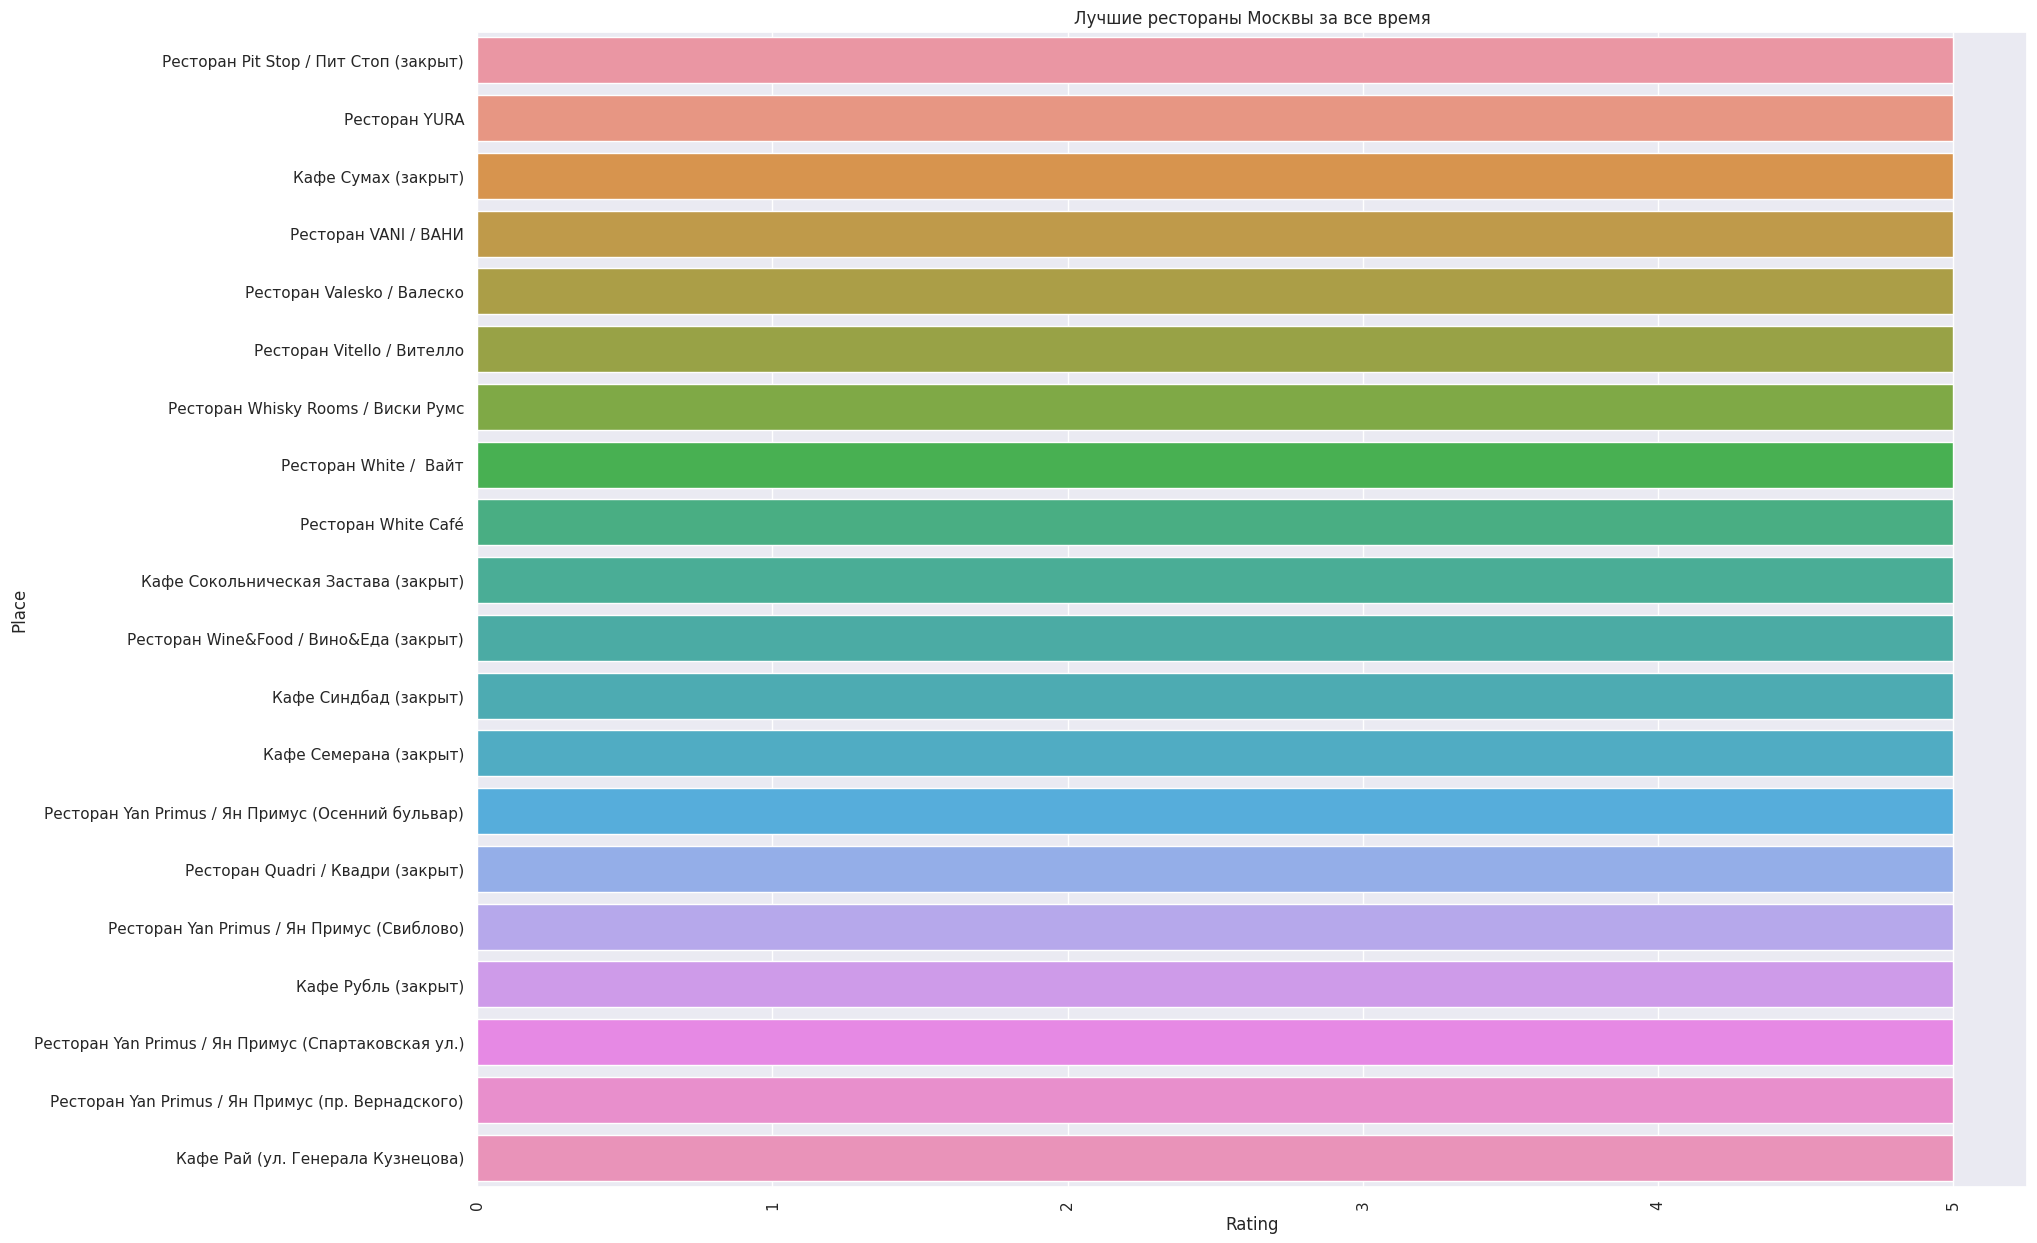

In [17]:
width = 20
height = 15

sns.set(rc = {'figure.figsize':(width, height)})
data = pd.DataFrame(src_dataset.groupby(['Place'])['Rating'].mean().sort_values(ascending=False)[:20])
data = data.reset_index()
data.columns = ['Place', 'Rating']

chart = sns.barplot(y = 'Place', x = 'Rating', data = data, orient="h")
plt.title('Лучшие рестораны Москвы за все время')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

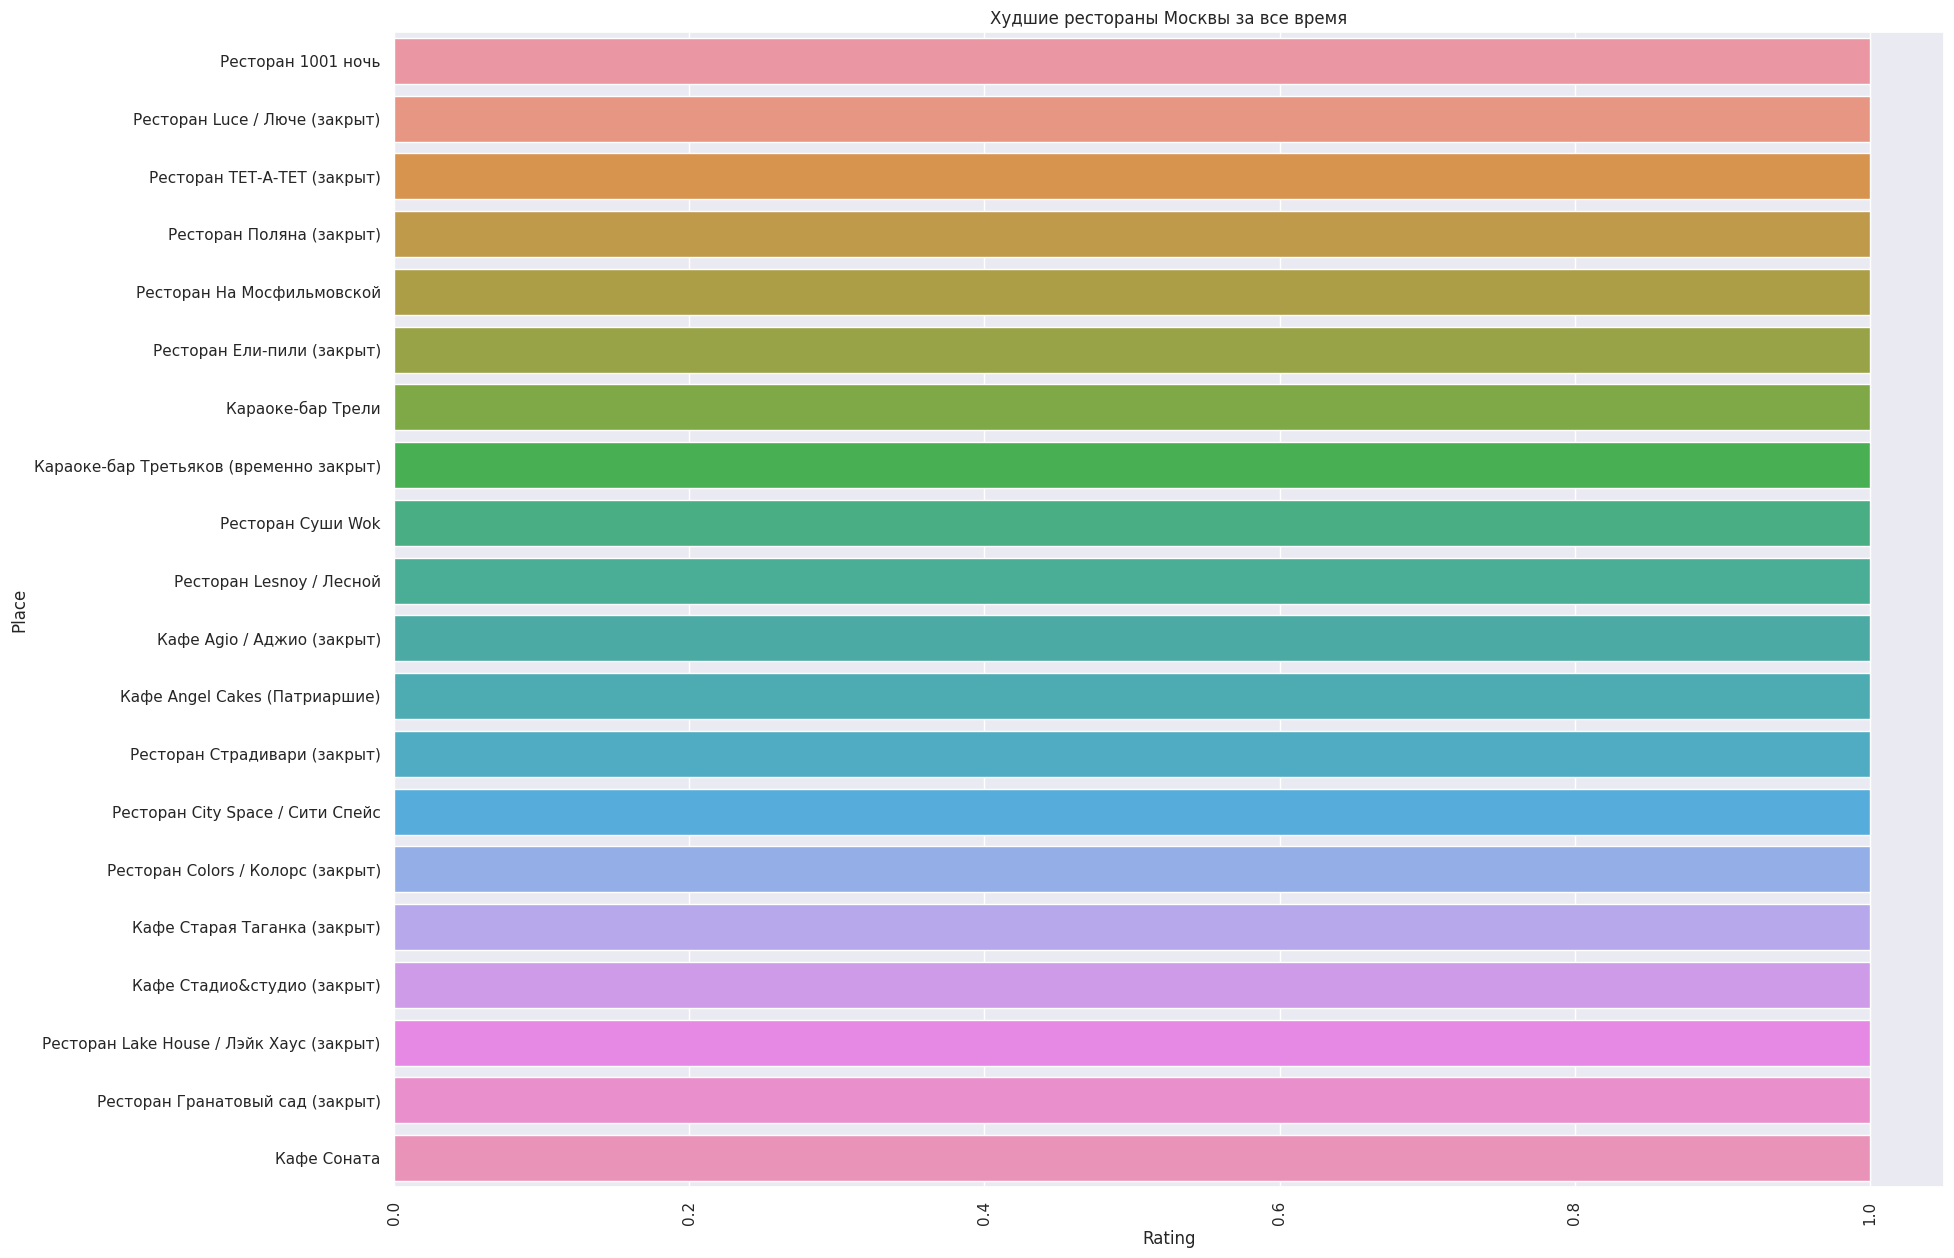

In [18]:
width = 20
height = 15

sns.set(rc = {'figure.figsize':(width, height)})
data = pd.DataFrame(src_dataset.groupby(['Place'])['Rating'].mean().sort_values(ascending=True)[:20])
data = data.reset_index()
data.columns = ['Place', 'Rating']

chart = sns.barplot(y = 'Place', x = 'Rating', data = data, orient="h")
plt.title('Худшие рестораны Москвы за все время')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [19]:
data = src_dataset[src_dataset["Year"].astype(int) == 2022].groupby(['Place'])['Rating'].mean().sort_values(ascending=False)[:20]

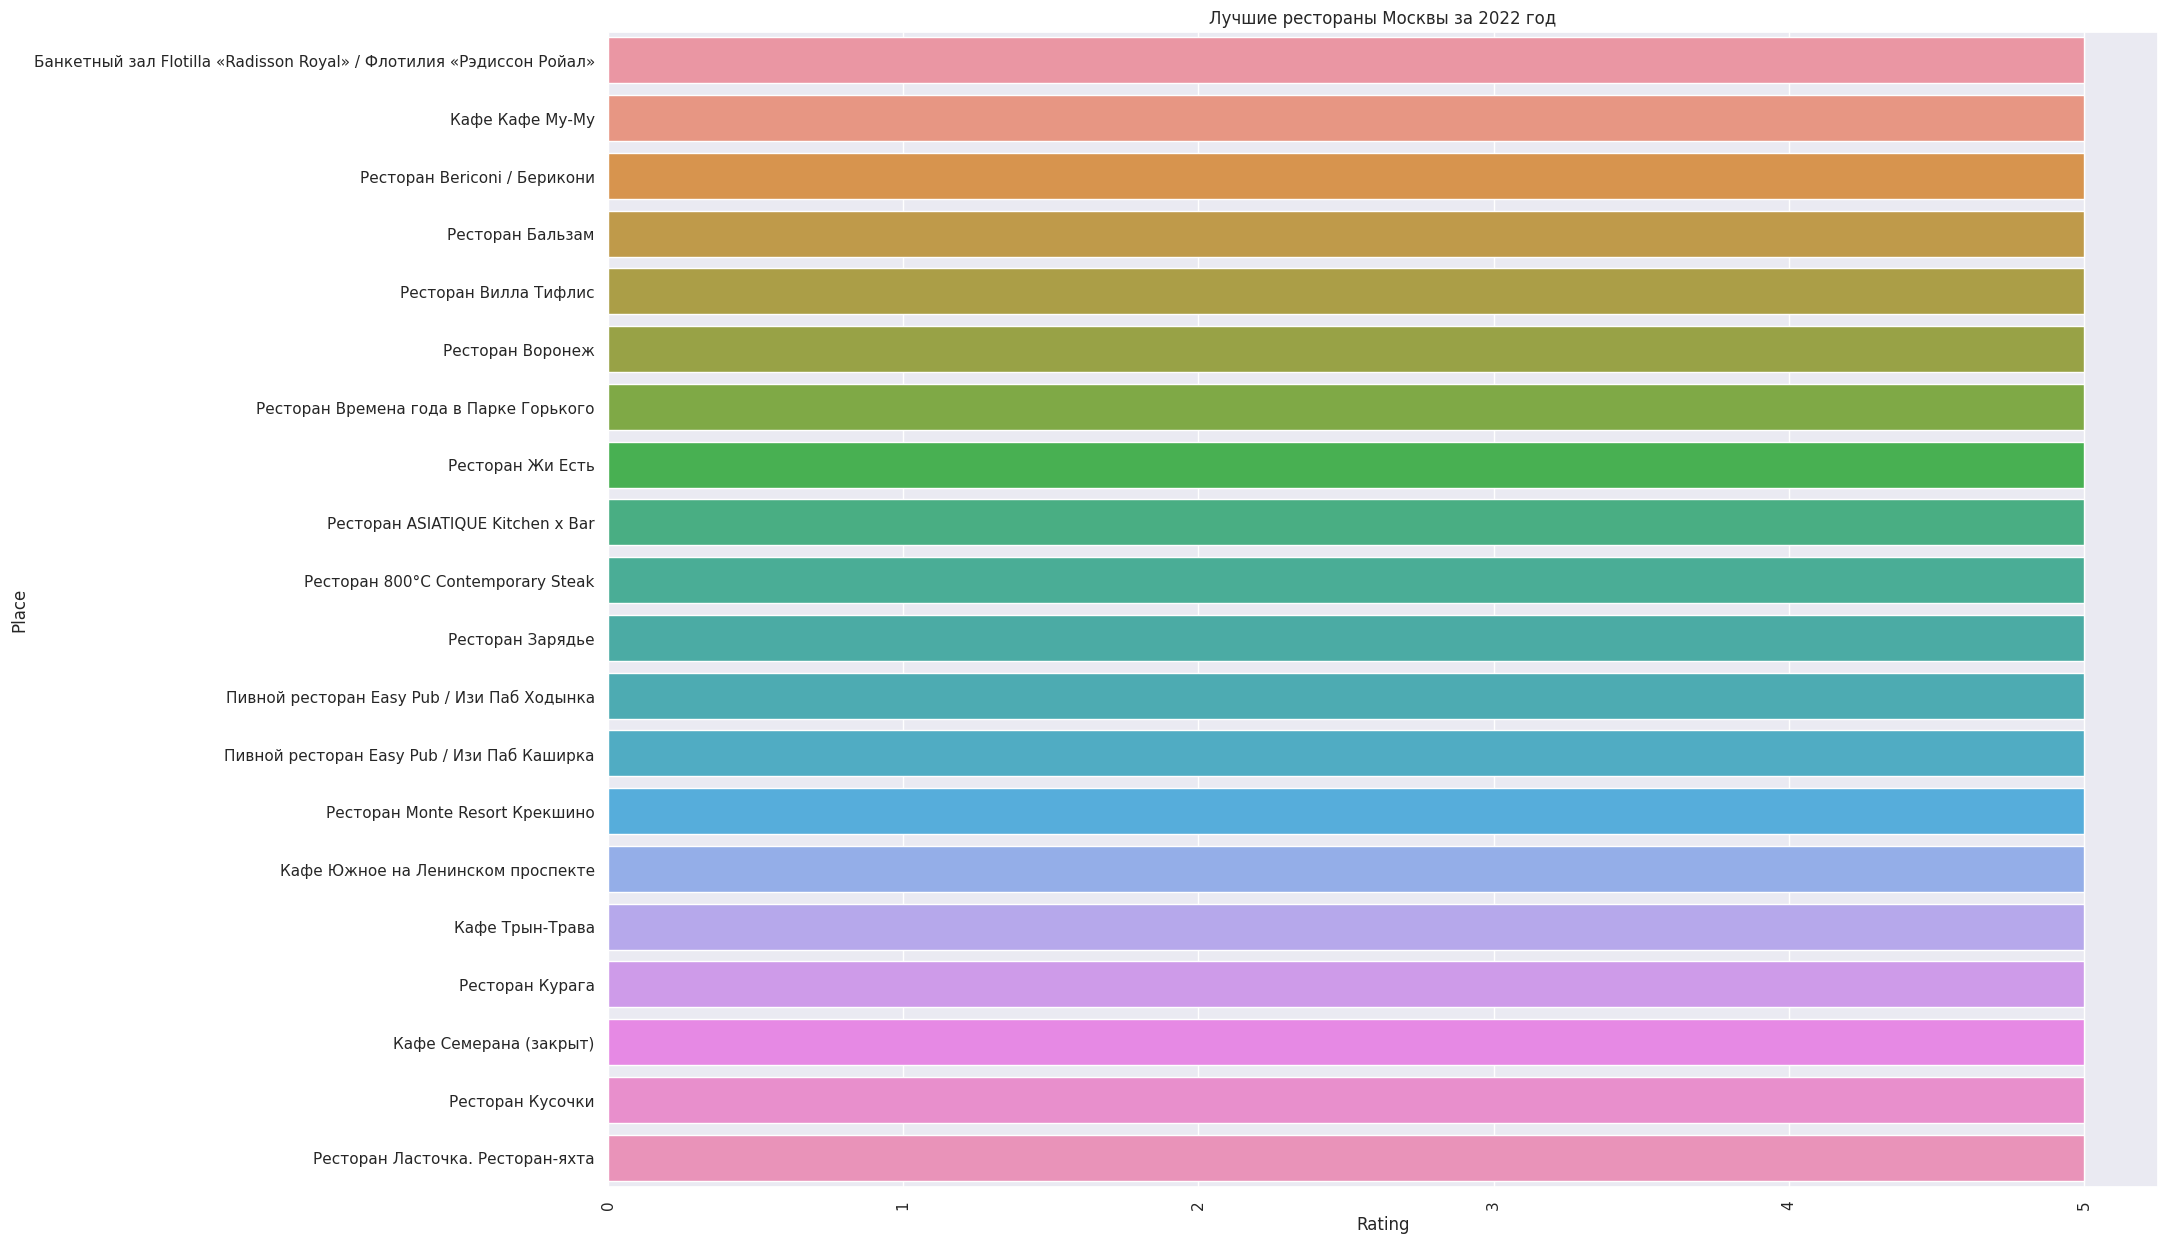

In [20]:
width = 20
height = 15

sns.set(rc = {'figure.figsize':(width, height)})
data = pd.DataFrame(src_dataset[src_dataset["Year"].astype(int) == 2022].groupby(['Place'])['Rating'].mean().sort_values(ascending=False)[:20])
data = data.reset_index()
data.columns = ['Place', 'Rating']

chart = sns.barplot(y = 'Place', x = 'Rating', data = data, orient="h")
plt.title('Лучшие рестораны Москвы за 2022 год')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

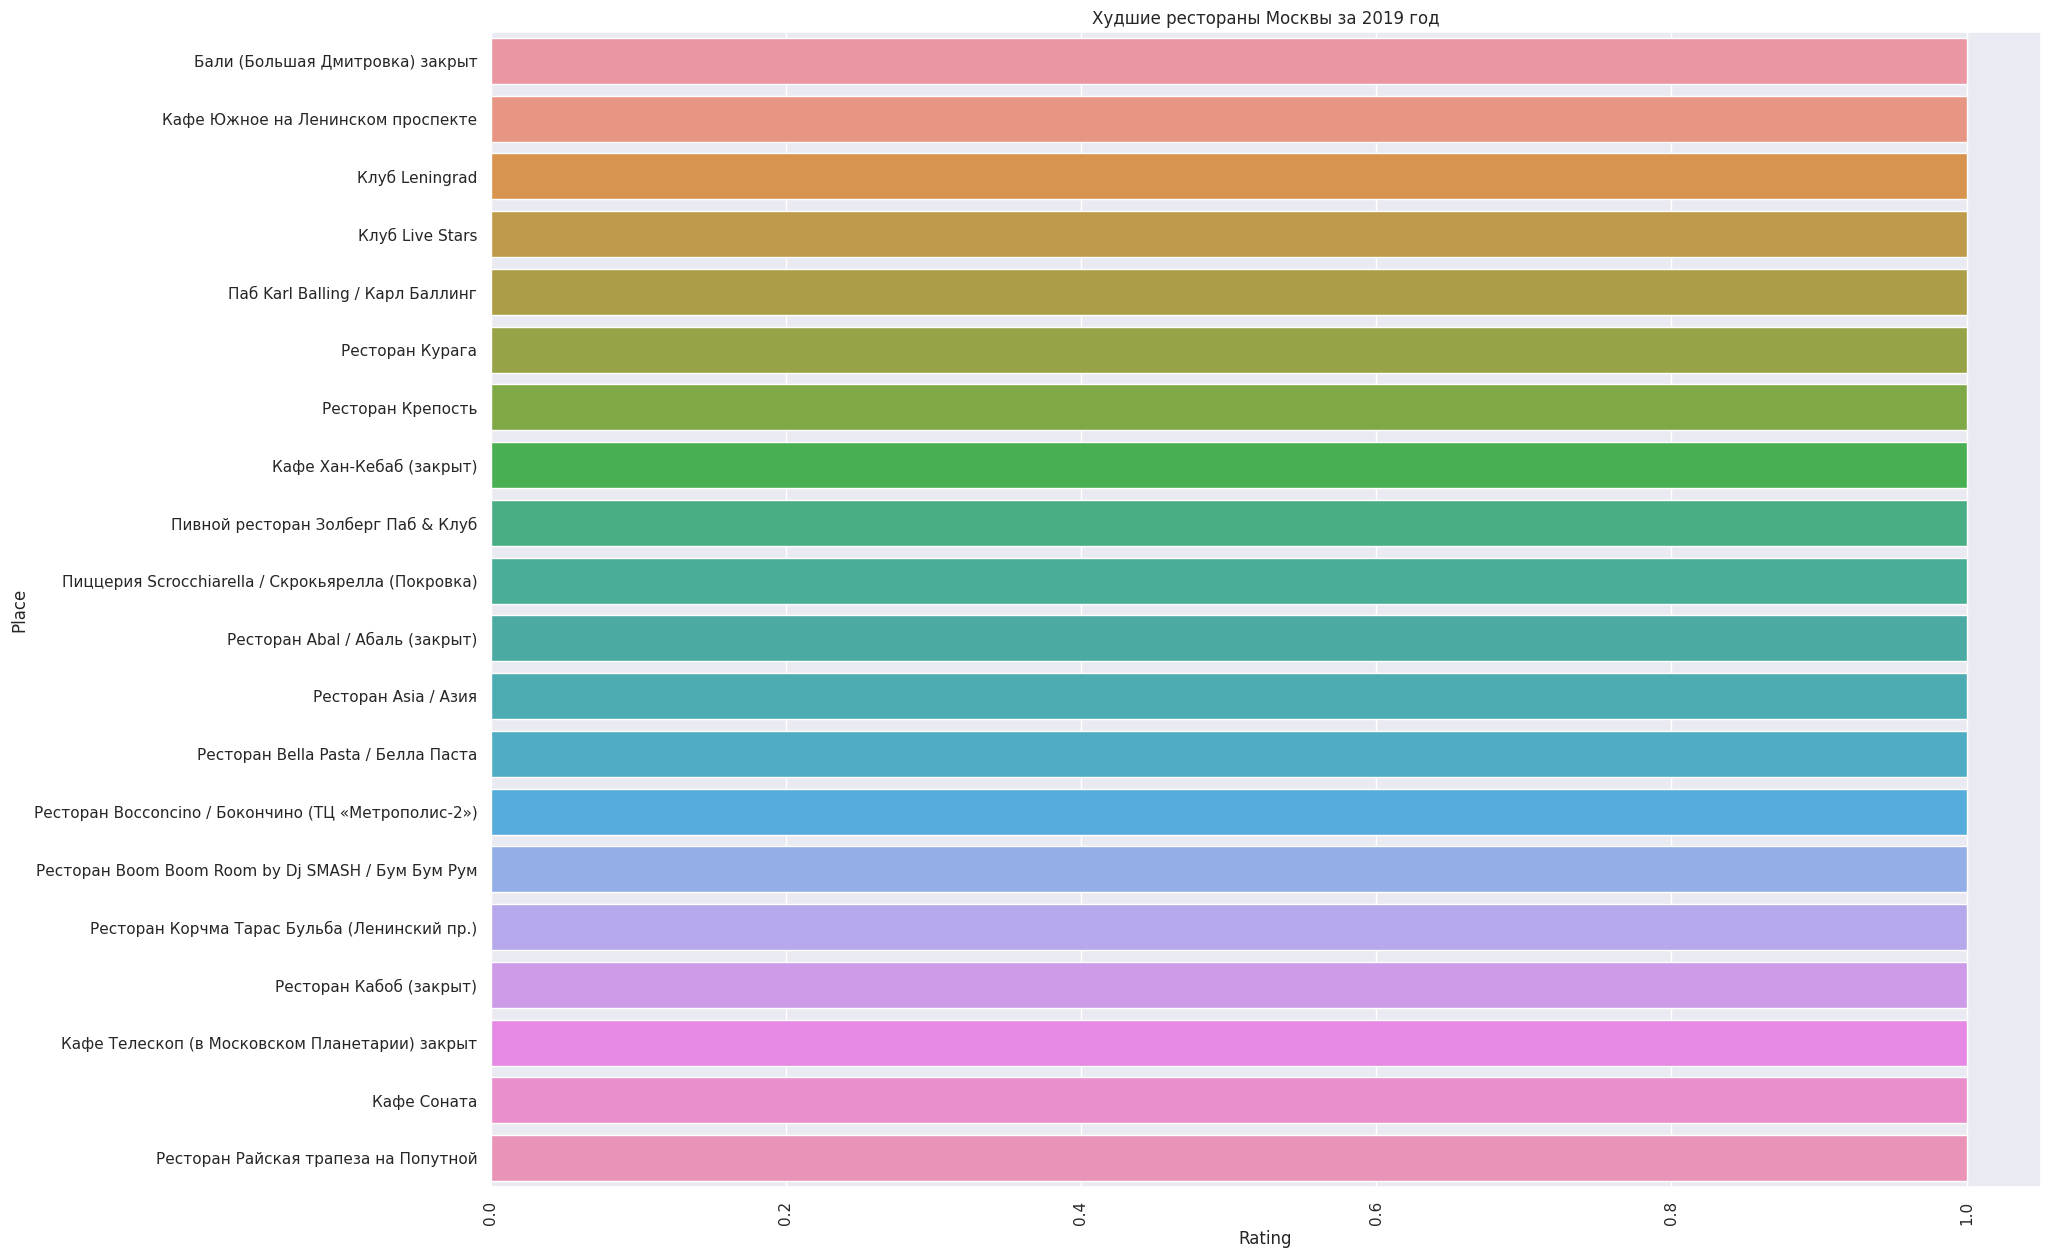

In [21]:
width = 20
height = 15

sns.set(rc = {'figure.figsize':(width, height)})
data = pd.DataFrame(src_dataset[src_dataset["Year"].astype(int) == 2019].groupby(['Place'])['Rating'].mean().sort_values(ascending=True)[:20])
data = data.reset_index()
data.columns = ['Place', 'Rating']

chart = sns.barplot(y = 'Place', x = 'Rating', data = data, orient="h")
plt.title('Худшие рестораны Москвы за 2019 год')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [22]:
src_dataset[src_dataset["Place"] == "Кафе Кафе Му-Му"].groupby(['Year'])['Rating'].mean()

Year
2016    5.000000
2017    4.714286
2018    5.000000
2019    4.870968
2020    3.970000
2022    5.000000
2023    5.000000
Name: Rating, dtype: float64

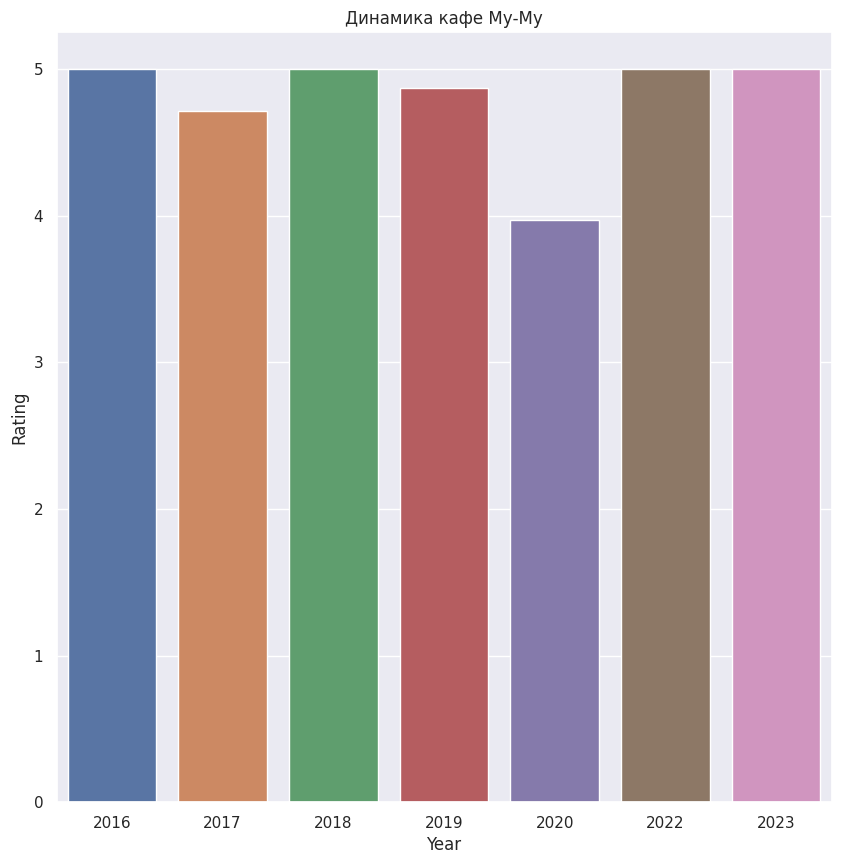

In [23]:
width = 10
height = 10
sns.set(rc = {'figure.figsize':(width, height)})
data = pd.DataFrame(src_dataset[src_dataset["Place"] == "Кафе Кафе Му-Му"].groupby(['Year'])['Rating'].mean())
data = data.reset_index()
data.columns = ['Year', 'Rating']

chart = sns.barplot(x = 'Year', y = 'Rating', data = data, orient="v")
plt.title('Динамика кафе Му-Му')
plt.show()

In [24]:
src_dataset[src_dataset["Place"] == "Ресторан Birds"].groupby(['Year'])['Rating'].mean()

Year
2019    2.2
2020    2.8
2021    2.1
2022    1.0
2023    3.9
Name: Rating, dtype: float64

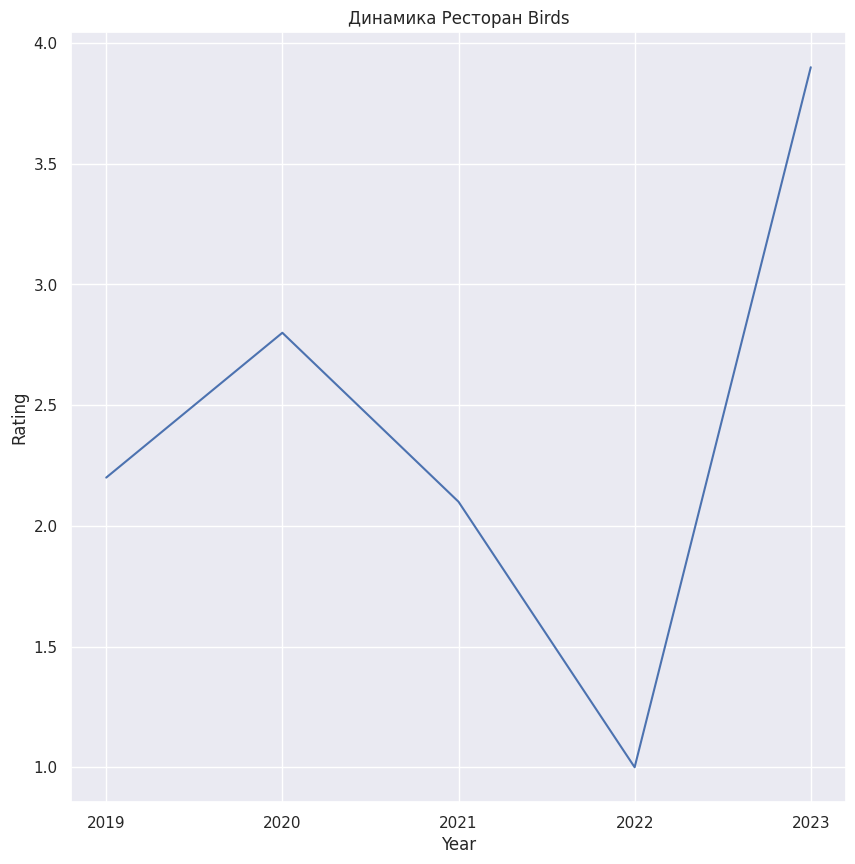

In [25]:
width = 10
height = 10
data = pd.DataFrame(src_dataset[src_dataset["Place"] == "Ресторан Birds"].groupby(['Year'])['Rating'].mean())
data = data.reset_index()
data.columns = ['Year', 'Rating']

chart = sns.lineplot(x = 'Year', y = 'Rating', data = data)
plt.title('Динамика Ресторан Birds')
plt.show()

In [40]:
best_restaurants = src_dataset.groupby(['Place'])['Rating'].mean().sort_values(ascending=False)[:10].index
worst_restaurants = src_dataset.groupby(['Place'])['Rating'].mean().sort_values(ascending=True)[:10].index

In [41]:
src_dataset[src_dataset["Place"].isin(best_restaurants)]

,Place,Author,Date,Review,Advantages,Disadvantages,Rating,Year
3121,Ресторан Pit Stop / Пит Стоп (закрыт),Сергей,2020-08-27,Отличный бильярдный клуб с хорошими столами и ...,Бильярд,,5.0,2020
4372,Ресторан VANI / ВАНИ,Лариса,2019-09-12,"Очень понравился ресторан, уютная обстановка,к...","Прекрасная кухня, хорошая атмосфера",Нет,5.0,2019
4409,Ресторан VANI / ВАНИ,nat-putinceva,2019-05-12,"Это наш любимый ресторан в Москве, часто ходим...",,,5.0,2019
5528,Ресторан YURA,Vorona,2019-02-07,"Были здесь с ребенком и готова сказать, что ме...",,,5.0,2019
6279,Ресторан White / Вайт,Валерия,2019-11-03,Очень хороший ресторан. На берегу воды. Кухня ...,,,5.0,2019
6669,Ресторан Pit Stop / Пит Стоп (закрыт),mariyasdfg4578,2019-01-19,"В целом, все хорошо, есть и еда и напитки, еди...",,,5.0,2019
6926,Ресторан Pit Stop / Пит Стоп (закрыт),vitaleydjdjjsj,2018-06-12,"Хорошая бильярдная, цены не высокие",,,5.0,2018
7039,Ресторан Pit Stop / Пит Стоп (закрыт),antonyantonny,2018-11-18,"Отличное место, жаль что не так часто проводят...",,,5.0,2018
7064,Ресторан Pit Stop / Пит Стоп (закрыт),alinamalinaddddeeee,2018-11-16,"Хорошая бильярдная, умеренные цены. Советую.",,,5.0,2018
7637,Ресторан Vitello / Вителло,Вениамин,2018-07-28,Лучшая кухня в Балашихе. На уровне хорошего мо...,,,5.0,2018


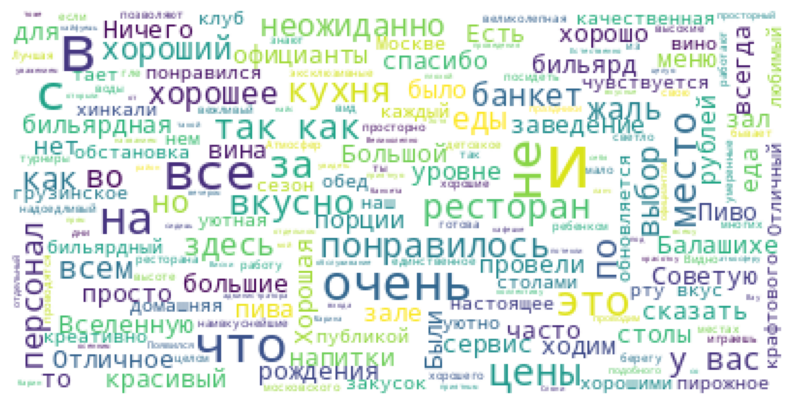

In [108]:
best_rest_text_raw = " ".join(src_dataset[src_dataset["Place"].isin(best_restaurants)]["Review"])
res_text = ""
for el in best_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

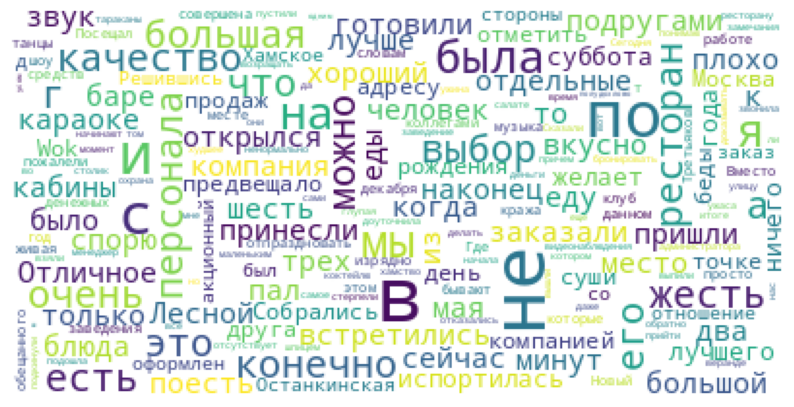

In [109]:
worst_rest_text_raw = " ".join(src_dataset[src_dataset["Place"].isin(worst_restaurants)]["Review"])
res_text = ""
for el in worst_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

In [47]:
morph = pymorphy2.MorphAnalyzer(lang='ru')

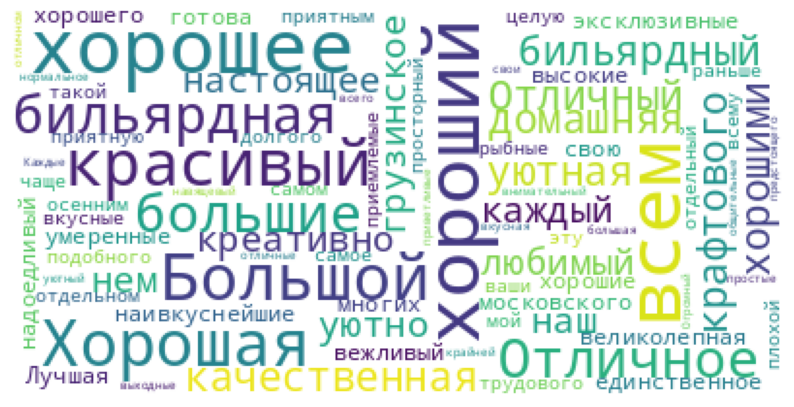

In [112]:
best_rest_text_raw = " ".join(src_dataset[src_dataset["Place"].isin(best_restaurants)]["Review"])
res_text = ""
for el in best_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    if 'ADJF' in morph.parse(morph.parse(splitted_word[i])[0].normal_form)[0].tag:
      res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

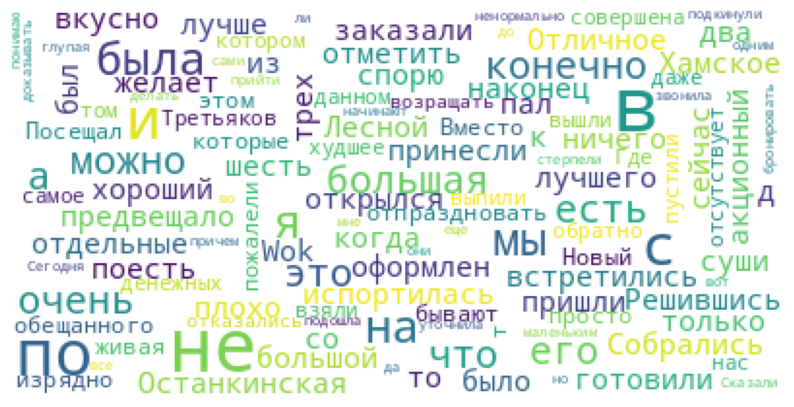

In [114]:
worst_rest_text_raw = " ".join(src_dataset[src_dataset["Place"].isin(worst_restaurants)]["Review"])
res_text = ""
for el in worst_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    if 'NOUN' not in morph.parse(morph.parse(splitted_word[i])[0].normal_form)[0].tag:
      res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

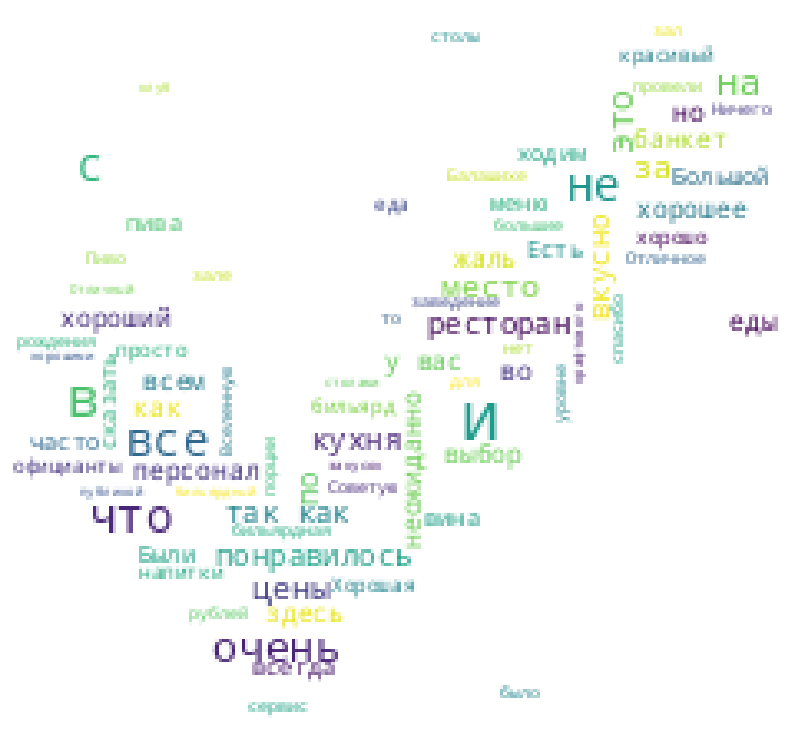

In [130]:
mask = np.array(Image.open("images.jpeg"))
best_rest_text_raw = " ".join(src_dataset[src_dataset["Place"].isin(best_restaurants)]["Review"])
res_text = ""
for el in best_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=20, relative_scaling=.5, mask=mask).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [134]:
src_dataset["rewiew_length"] = src_dataset.apply(lambda row: len(str(row['Review'])), axis = 1)

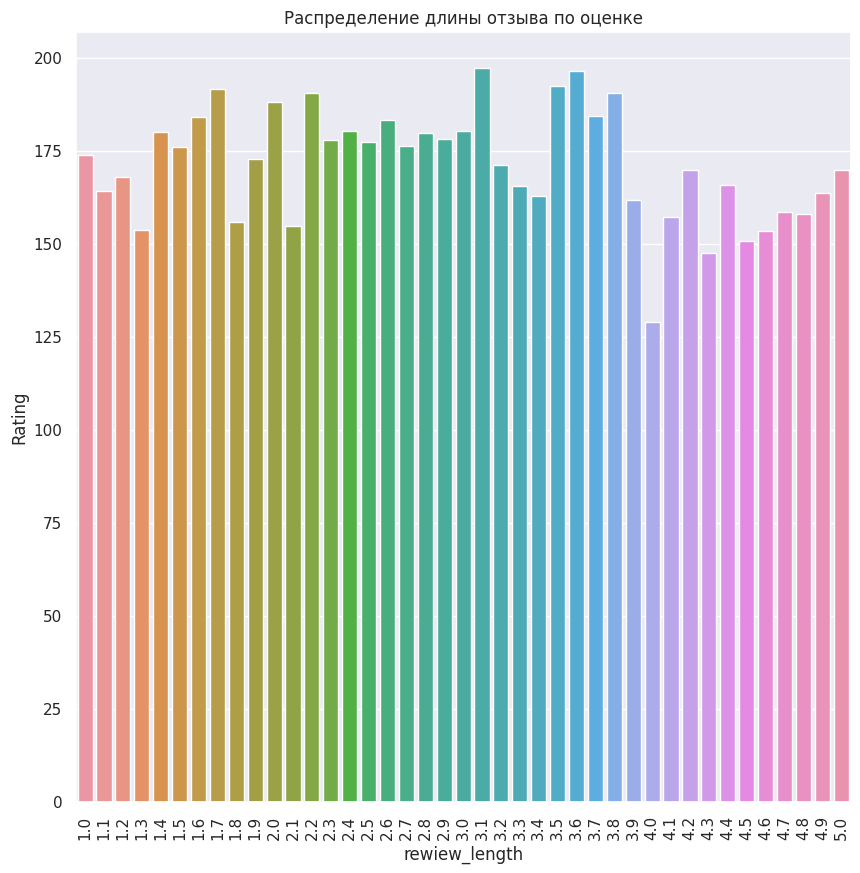

In [138]:
width = 10
height = 10
sns.set(rc = {'figure.figsize':(width, height)})
data = pd.DataFrame(src_dataset.groupby(['Rating'])['rewiew_length'].mean())
data = data.reset_index()
data.columns = ['rewiew_length', 'Rating']

chart = sns.barplot(x = 'rewiew_length', y = 'Rating', data = data, orient="v")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Распределение длины отзыва по оценке')
plt.show()